In [1]:
import sys, os
sys.path.append(os.path.abspath('../'))
from matplotlib import pyplot as plt
from model import LLM, LLMconfig
import torch

In [2]:
# ckpt = torch.load('llm_model.pt', weights_only=False)
iters = 5000
eval_int = 100

gqa_dense 		= torch.load('gqa_dense.pt', 	  weights_only=False)
gqa_moe 		= torch.load('gqa_moe.pt', 		  weights_only=False)
mla_dense 		= torch.load('mla_dense.pt', 	  weights_only=False)
mla_moe 		= torch.load('mla_moe.pt', 		  weights_only=False)
sin_mhla_dense  = torch.load('sin_mhla_dense.pt', weights_only=False)
sin_mhla_moe 	= torch.load('sin_mhla_moe.pt',	  weights_only=False)

In [3]:
replicas = {
    'gqa_dense'		: LLM(gqa_dense['config']),
	'gqa_moe'		: LLM(gqa_moe['config']),
    'mla_dense'		: LLM(mla_dense['config']),
	'mla_moe'		: LLM(mla_moe['config']),
    'sin_mhla_dense': LLM(sin_mhla_dense['config']),
	'sin_mhla_moe'	: LLM(sin_mhla_moe['config'])}

parms = {
	'gqa_dense'		: replicas['gqa_dense'].get_num_params(),
	'gqa_moe'		: replicas['gqa_moe'].get_num_params(),
	'mla_dense'		: replicas['mla_dense'].get_num_params(),
	'mla_moe'		: replicas['mla_moe'].get_num_params(),
	'sin_mhla_dense': replicas['sin_mhla_dense'].get_num_params(),
	'sin_mhla_moe'	: replicas['sin_mhla_moe'].get_num_params()}

train_losses = {
	'gqa_dense'		: gqa_dense['losses']['train'][eval_int:-1],
	'gqa_moe'		: gqa_moe['losses']['train'][eval_int:-1],
	'mla_dense'		: mla_dense['losses']['train'][eval_int:-1],
	'mla_moe'		: mla_moe['losses']['train'][eval_int:-1],
	'sin_mhla_dense': sin_mhla_dense['losses']['train'][eval_int:-1],
	'sin_mhla_moe'	: sin_mhla_moe['losses']['train'][eval_int:-1]}

valrun_val_losses = {
	'gqa_dense'		: gqa_dense['losses']['valrun_val'],
	'gqa_moe'		: gqa_moe['losses']['valrun_val'],
	'mla_dense'		: mla_dense['losses']['valrun_val'],
	'mla_moe'		: mla_moe['losses']['valrun_val'],
	'sin_mhla_dense': sin_mhla_dense['losses']['valrun_val'],
	'sin_mhla_moe'	: sin_mhla_moe['losses']['valrun_val']}

valrun_train_losses = {
	'gqa_dense'		: gqa_dense['losses']['valrun_train'],
	'gqa_moe'		: gqa_moe['losses']['valrun_train'],
	'mla_dense'		: mla_dense['losses']['valrun_train'],
	'mla_moe'		: mla_moe['losses']['valrun_train'],
	'sin_mhla_dense': sin_mhla_dense['losses']['valrun_train'],
	'sin_mhla_moe'	: sin_mhla_moe['losses']['valrun_train']}

In [4]:
steps = range(iters)[eval_int:]
val_steps = range(0,iters,eval_int)	

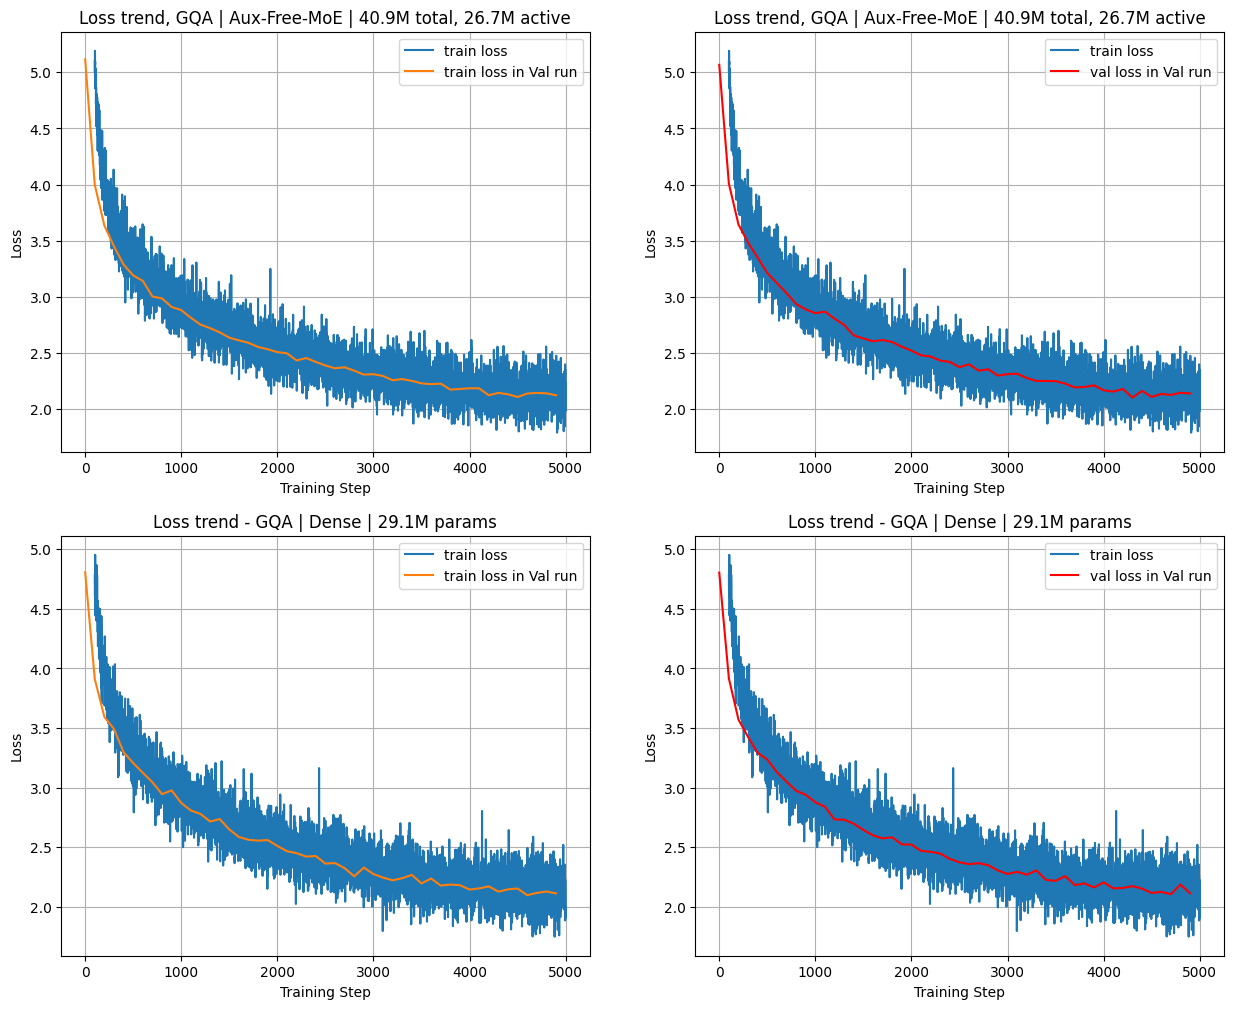

In [5]:
# Plot for GQA model
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs[0,0].plot(steps, train_losses['gqa_moe'], label='train loss')
axs[0,0].plot(val_steps, valrun_train_losses['gqa_moe'], label='train loss in Val run')
axs[0,1].plot(steps, train_losses['gqa_moe'], label='train loss')
axs[0,1].plot(val_steps, valrun_val_losses['gqa_moe'], label='val loss in Val run', color='red')

for i in (0,1):
	axs[0,i].grid(True)
	axs[0,i].set_xlabel('Training Step')
	axs[0,i].set_ylabel('Loss')
	axs[0,i].set_title(f"Loss trend, GQA | Aux-Free-MoE | {parms['gqa_moe'][0]/1e6:.1f}M total, {parms['gqa_moe'][1]/1e6:.1f}M active")
	axs[0,i].legend()

axs[1,0].plot(steps, train_losses['gqa_dense'], label='train loss')
axs[1,0].plot(val_steps, valrun_train_losses['gqa_dense'], label='train loss in Val run')
axs[1,1].plot(steps, train_losses['gqa_dense'], label='train loss')
axs[1,1].plot(val_steps, valrun_val_losses['gqa_dense'], label='val loss in Val run', color='red')

for i in (0,1):
	axs[1,i].grid(True)
	axs[1,i].set_xlabel('Training Step')
	axs[1,i].set_ylabel('Loss')
	axs[1,i].set_title(f"Loss trend - GQA | Dense | {parms['gqa_dense'][0]/1e6:.1f}M params")
	axs[1,i].legend()

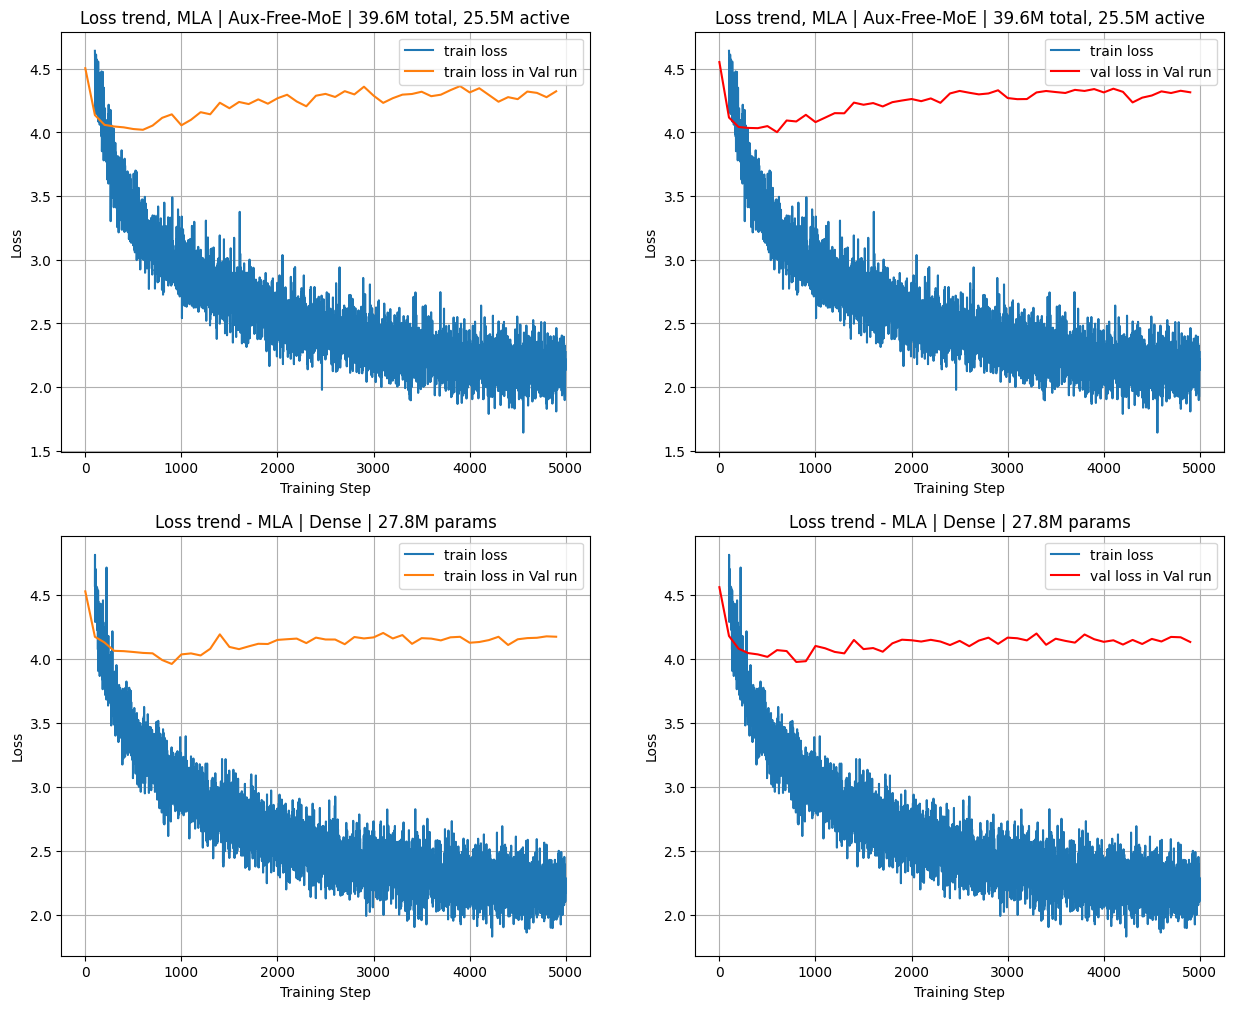

In [6]:
# Plot for MLA model
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs[0,0].plot(steps, train_losses['mla_moe'], label='train loss')
axs[0,0].plot(val_steps, valrun_train_losses['mla_moe'], label='train loss in Val run')
axs[0,1].plot(steps, train_losses['mla_moe'], label='train loss')
axs[0,1].plot(val_steps, valrun_val_losses['mla_moe'], label='val loss in Val run', color='red')

for i in (0,1):
	axs[0,i].grid(True)
	axs[0,i].set_xlabel('Training Step')
	axs[0,i].set_ylabel('Loss')
	axs[0,i].set_title(f"Loss trend, MLA | Aux-Free-MoE | {parms['mla_moe'][0]/1e6:.1f}M total, {parms['mla_moe'][1]/1e6:.1f}M active")
	axs[0,i].legend()
axs[1,0].plot(steps, train_losses['mla_dense'], label='train loss')
axs[1,0].plot(val_steps, valrun_train_losses['mla_dense'], label='train loss in Val run')
axs[1,1].plot(steps, train_losses['mla_dense'], label='train loss')
axs[1,1].plot(val_steps, valrun_val_losses['mla_dense'], label='val loss in Val run', color='red')

for i in (0,1):
	axs[1,i].grid(True)
	axs[1,i].set_xlabel('Training Step')
	axs[1,i].set_ylabel('Loss')
	axs[1,i].set_title(f"Loss trend - MLA | Dense | {parms['mla_dense'][0]/1e6:.1f}M params")
	axs[1,i].legend()

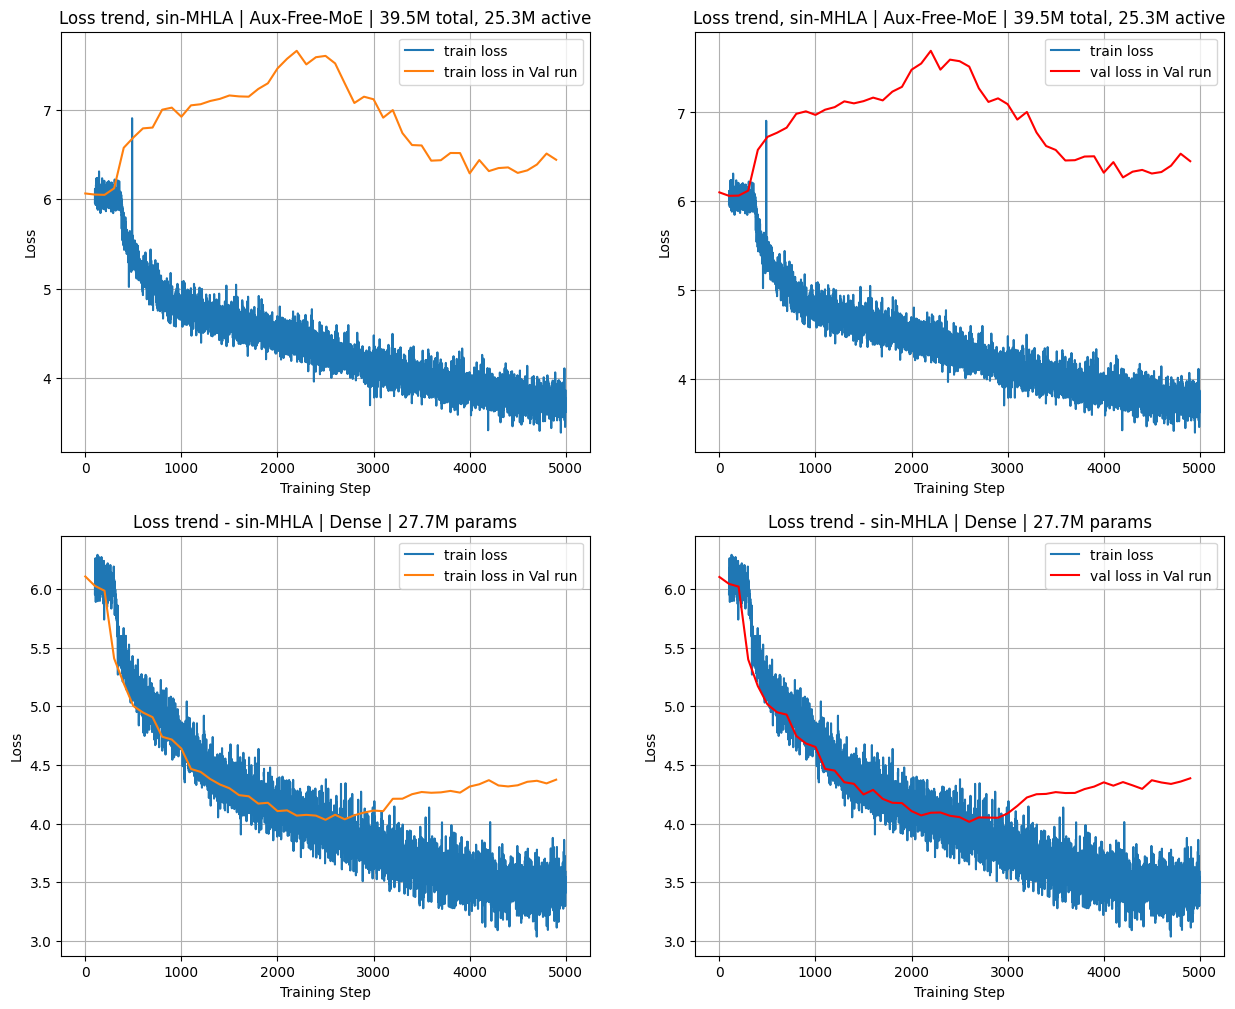

In [7]:
# Plot for sin-MHLA model
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs[0,0].plot(steps, train_losses['sin_mhla_moe'], label='train loss')
axs[0,0].plot(val_steps, valrun_train_losses['sin_mhla_moe'], label='train loss in Val run')
axs[0,1].plot(steps, train_losses['sin_mhla_moe'], label='train loss')
axs[0,1].plot(val_steps, valrun_val_losses['sin_mhla_moe'], label='val loss in Val run', color='red')

for i in (0,1):
	axs[0,i].grid(True)
	axs[0,i].set_xlabel('Training Step')
	axs[0,i].set_ylabel('Loss')
	axs[0,i].set_title(f"Loss trend, sin-MHLA | Aux-Free-MoE | {parms['sin_mhla_moe'][0]/1e6:.1f}M total, {parms['sin_mhla_moe'][1]/1e6:.1f}M active")
	axs[0,i].legend()

axs[1,0].plot(steps, train_losses['sin_mhla_dense'], label='train loss')
axs[1,0].plot(val_steps, valrun_train_losses['sin_mhla_dense'], label='train loss in Val run')
axs[1,1].plot(steps, train_losses['sin_mhla_dense'], label='train loss')
axs[1,1].plot(val_steps, valrun_val_losses['sin_mhla_dense'], label='val loss in Val run', color='red')

for i in (0,1):
	axs[1,i].grid(True)
	axs[1,i].set_xlabel('Training Step')
	axs[1,i].set_ylabel('Loss')
	axs[1,i].set_title(f"Loss trend - sin-MHLA | Dense | {parms['sin_mhla_dense'][0]/1e6:.1f}M params")
	axs[1,i].legend()

In [8]:
# AFTER BUG FIX
ckpt = torch.load('test_run.pt', weights_only=False) 
replica = LLM(ckpt['config'])
_total,_ = replica.get_num_params()
_steps = range(150,ckpt['iters'])
_eval_int = 250
_val_steps = range(250,ckpt['iters']+1,250)
_train = ckpt['losses']['train'][150:-1]
_val = ckpt['losses']['valrun_val']
_vtrain = ckpt['losses']['valrun_train']

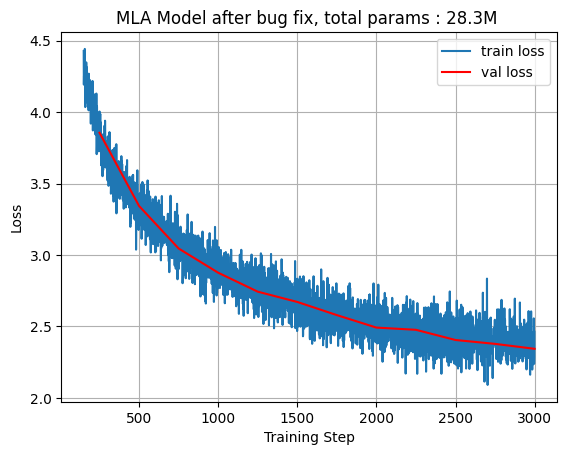

In [9]:
# AFTER BUG FIX

plt.plot(_steps, _train, label='train loss')
# plt.plot(_val_steps, _vtrain, label='train loss in Val run')
plt.plot(_val_steps, _val, label='val loss', color='red')
plt.grid(True)
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title(f"MLA Model after bug fix, total params : {_total/1e6:.1f}M ")
plt.legend()